In [ ]:
import pandas as pd
import numpy as np
# !pip install yfinance
import yfinance as yf 

In [10]:
# sp500=yf.Ticker("^GSPC")
# sp500= sp500.history(period="max")

In [39]:
msci_em= yf.Ticker("EEM")
msci_em= msci_em.history(period="max")


In [40]:
msci_em

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-04-14,7.856559,7.911390,7.856559,7.911390,93600,0.0,0.0
2003-04-15,7.959957,8.028889,7.959957,8.005389,421200,0.0,0.0
2003-04-16,8.091551,8.130716,8.091551,8.097817,9000,0.0,0.0
2003-04-17,8.142466,8.158131,8.128366,8.155782,17100,0.0,0.0
2003-04-21,8.165186,8.165969,8.146387,8.152653,72900,0.0,0.0
...,...,...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300,0.0,0.0
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600,0.0,0.0
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200,0.0,0.0


In [41]:
msci_em.index

DatetimeIndex(['2003-04-14', '2003-04-15', '2003-04-16', '2003-04-17',
               '2003-04-21', '2003-04-22', '2003-04-23', '2003-04-24',
               '2003-04-25', '2003-04-28',
               ...
               '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-08', '2022-08-09', '2022-08-10',
               '2022-08-11', '2022-08-12'],
              dtype='datetime64[ns]', name='Date', length=4868, freq=None)

<AxesSubplot:xlabel='Date'>

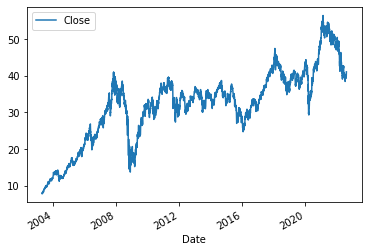

In [42]:
msci_em.plot.line(y="Close", use_index=True)

In [43]:
lean_df = msci_em.drop(["Dividends", "Stock Splits"], axis = 1)
lean_df

,Open,High,Low,Close,Volume
Date,,,,,
2003-04-14,7.856559,7.911390,7.856559,7.911390,93600
2003-04-15,7.959957,8.028889,7.959957,8.005389,421200
2003-04-16,8.091551,8.130716,8.091551,8.097817,9000
2003-04-17,8.142466,8.158131,8.128366,8.155782,17100
2003-04-21,8.165186,8.165969,8.146387,8.152653,72900
...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200


Create a new column Tomorrow that takes the closing price of the day after the currently looked at date

In [44]:
lean_df['Tomorrow'] = lean_df["Close"].shift(-1)

In [45]:
lean_df

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2003-04-14,7.856559,7.911390,7.856559,7.911390,93600,8.005389
2003-04-15,7.959957,8.028889,7.959957,8.005389,421200,8.097817
2003-04-16,8.091551,8.130716,8.091551,8.097817,9000,8.155782
2003-04-17,8.142466,8.158131,8.128366,8.155782,17100,8.152653
2003-04-21,8.165186,8.165969,8.146387,8.152653,72900,8.180067
...,...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300,39.959999
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600,40.459999
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200,40.619999


Based on the column "Tomorrow", if tomorrows closing price is higher than the current, the "Target" value will be 1 indicating that the market went up

In [46]:
lean_df['Target']= (lean_df['Tomorrow'] > lean_df['Close']).astype(int)
lean_df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2003-04-14,7.856559,7.911390,7.856559,7.911390,93600,8.005389,1
2003-04-15,7.959957,8.028889,7.959957,8.005389,421200,8.097817,1
2003-04-16,8.091551,8.130716,8.091551,8.097817,9000,8.155782,1
2003-04-17,8.142466,8.158131,8.128366,8.155782,17100,8.152653,0
2003-04-21,8.165186,8.165969,8.146387,8.152653,72900,8.180067,1
...,...,...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300,39.959999,0
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600,40.459999,1
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200,40.619999,1


Define predictors and target variable

In [80]:
# X= lean_df.drop(['Tomorrow', 'Target'], axis = 1)
# target_var = lean_df.Target

# from sklearn.model_selection import train_test_split   
# X_train, X_test, y_train, y_test = train_test_split(X, target_var, test_size= 0.2)

# The tarin_test_split method is not useful in a time series forecasting problem due to it's
# neglect of time sensitive movements of the variables

In [64]:
train = lean_df.iloc[:-100]
test = lean_df.iloc[-100:]

predictors= ["Close", "High", "Low", "Open", "Volume"]

Random Forest as the chosen algorithm

In [65]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=42)

# model.fit(X_train, y_train)
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [71]:
# model.score(X_test, y_test)
model.score(test[predictors], test["Target"] )

0.46

In [76]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)
preds

Date
2022-03-22    1
2022-03-23    0
2022-03-24    1
2022-03-25    0
2022-03-28    1
             ..
2022-08-08    1
2022-08-09    1
2022-08-10    0
2022-08-11    0
2022-08-12    1
Length: 100, dtype: int32

<AxesSubplot:xlabel='Date'>

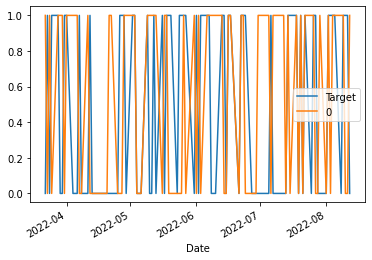

In [77]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined.plot()